Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Specifying training and testing dataset

In [2]:
TRAIN_PATH = 'sign_mnist_train.csv'
VALID_PATH = 'sign_mnist_test.csv'
NO_CLASSES = 26

Reading and printing the training and testing Dataset

In [17]:
trainData = pd.read_csv(TRAIN_PATH)
print(trainData.head(6))

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   
5     16     161     168     172     173     178     184     189     193   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

In [16]:
print(trainData)

       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          3     107     118     127     134     139     143     146     150   
1          6     155     157     156     156     156     157     156     158   
2          2     187     188     188     187     187     186     187     188   
3          2     211     211     212     212     211     210     211     210   
4         13     164     167     170     172     176     179     180     184   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
27450     13     189     189     190     190     192     193     193     193   
27451     23     151     154     157     158     160     161     163     164   
27452     18     174     174     174     174     174     175     175     174   
27453     17     177     181     184     185     187     189     190     191   
27454     23     179     180     180     180     182     181     182     183   

       pixel9  ...  pixel775  pixel776 

In [4]:
validData = pd.read_csv(VALID_PATH)
print(validData.head(5))

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      6     149     149     150     150     150     151     151     150   
1      5     126     128     131     132     133     134     135     135   
2     10      85      88      92      96     105     123     135     143   
3      0     203     205     207     206     207     209     210     209   
4      3     188     191     193     195     199     201     202     203   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     151  ...       138       148       127        89        82        96   
1     136  ...        47       104       194       183       186       184   
2     147  ...        68       166       242       227       230       227   
3     210  ...       154       248       247       248       253       236   
4     203  ...        26        40        64        48        29        46   

   pixel781  pixel782  pixel783  pixel784  
0       106       112       12

Transforming the data so that it can be fed into the CNN

In [5]:
x_train = np.array(trainData.drop(columns=['label']))
y_train = np.array(trainData['label'])
x_valid = np.array(validData.drop(columns=['label']))
y_valid = np.array(validData['label'])

Scaling the data

In [6]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_train = x_train/255.0
x_valid = x_valid.reshape(len(x_valid),28,28,1)
x_valid = x_valid/255.0

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((27455, 28, 28, 1), (27455,), (7172, 28, 28, 1), (7172,))

Defining Model

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(15, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(26, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling Model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=7, validation_data=(x_valid,y_valid))
model.save('sign_language_mnist_cnn.h5')

Epoch 1/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.3871 - loss: 2.0507 - val_accuracy: 0.8540 - val_loss: 0.4617
Epoch 2/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9297 - loss: 0.2218 - val_accuracy: 0.9078 - val_loss: 0.3356
Epoch 3/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9732 - loss: 0.0857 - val_accuracy: 0.9096 - val_loss: 0.3600
Epoch 4/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9821 - loss: 0.0564 - val_accuracy: 0.9332 - val_loss: 0.3381
Epoch 5/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9896 - loss: 0.0328 - val_accuracy: 0.9399 - val_loss: 0.3339
Epoch 6/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9917 - loss: 0.0278 - val_accuracy: 0.9322 - val_loss: 0.3142
Epoch 7/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9916 - loss: 0.0247 - val_accuracy: 0.9321 - val_loss: 0.2662


Testing the Data

In [11]:
testImage = x_valid[1] #We will take an image from the training dataset
prediction = model.predict(testImage.reshape(-1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Display the Output

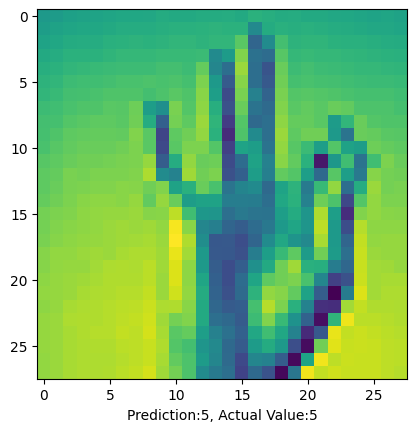

In [12]:
plt.imshow(testImage.reshape(28, 28)) #plt.imshow() requires a 2D array, so we reshape the input
plt.xlabel(f"Prediction:{np.argmax(prediction)}, Actual Value:{y_valid[1]}")
plt.show()

In [14]:
testImage = x_valid[5] #We will take an image from the training dataset
prediction = model.predict(testImage.reshape(-1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


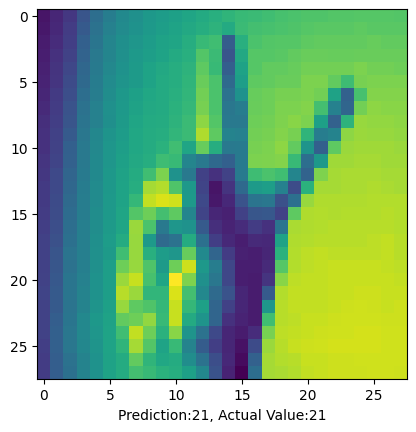

In [15]:
plt.imshow(testImage.reshape(28, 28)) #plt.imshow() requires a 2D array, so we reshape the input
plt.xlabel(f"Prediction:{np.argmax(prediction)}, Actual Value:{y_valid[5]}")
plt.show()
